In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv("wine.csv")
print(df.head(5))

  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                  

In [4]:
file_path='wine.csv'
df=pd.read_csv(file_path,delimiter=';',quotechar='"')
print(df.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


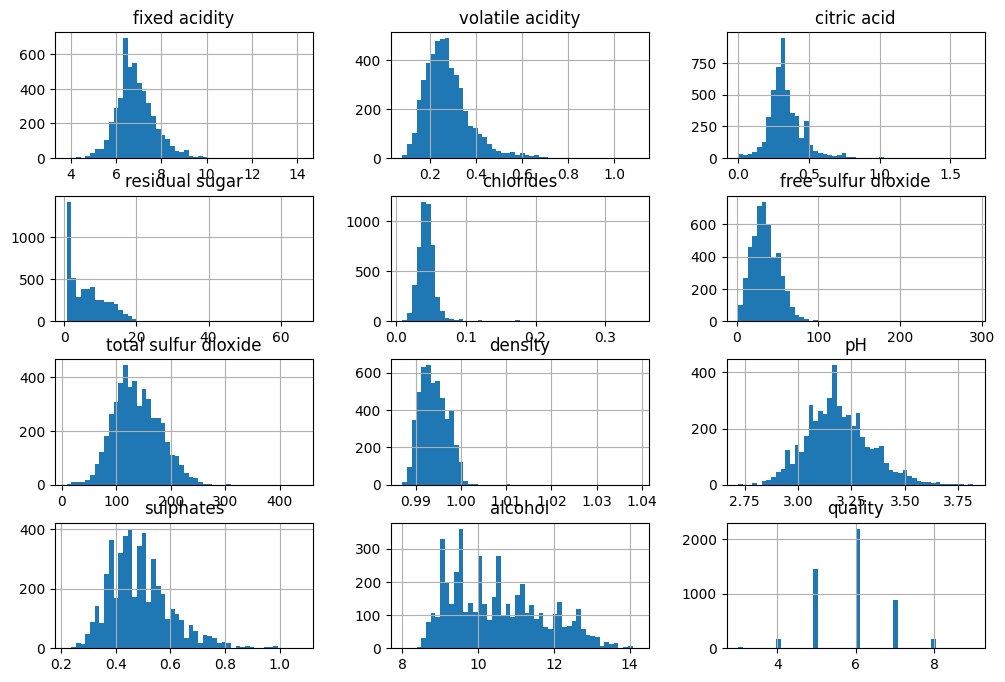

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(12,8))
plt.show()

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [12]:
print(len(x))

4898


In [13]:
print(len(y))

4898


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
print(len(x_train))

3918


In [17]:
print(len(y_train))

3918


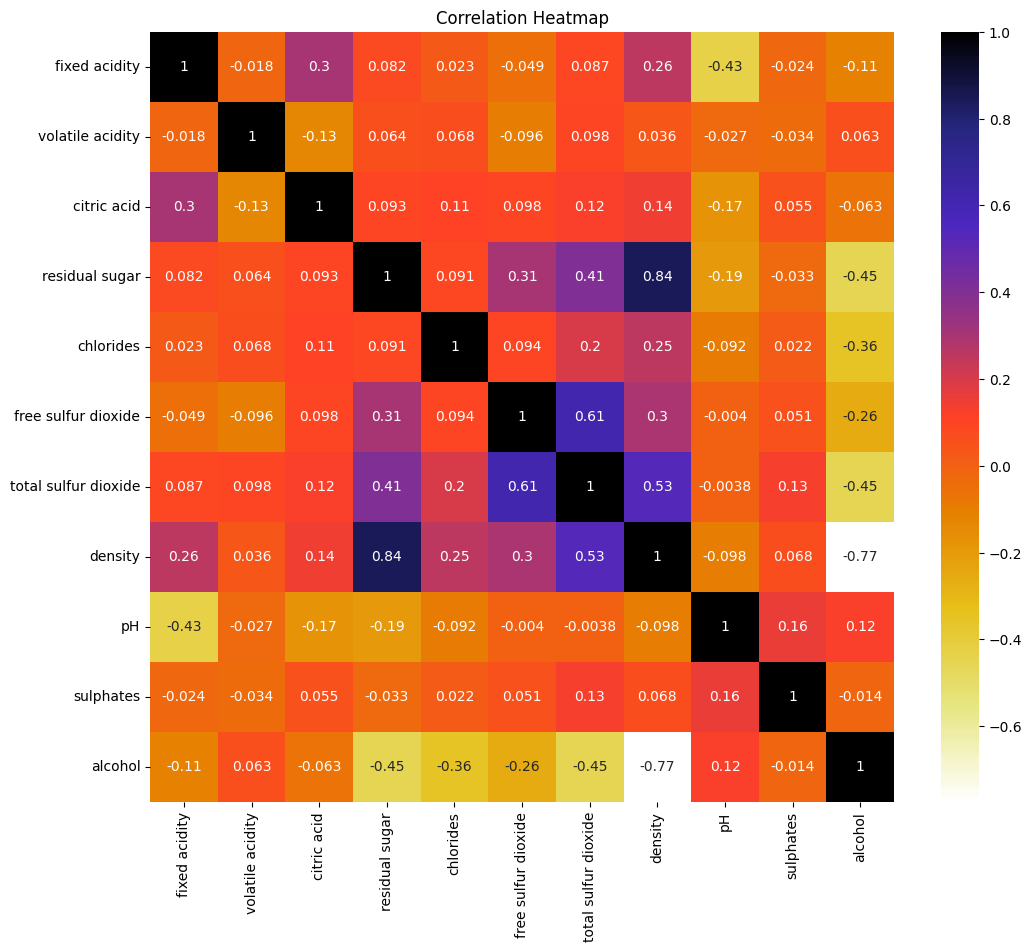

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
x_train_df = pd.DataFrame(x_train)
cor = x_train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1])
plt.title('Correlation Heatmap')
plt.show()

In [25]:
column_to_drop = 3 
x_train_cor = np.delete(x_train, column_to_drop, axis=1)
x_test_cor=np.delete(x_test,column_to_drop,axis=1)

In [26]:
print(len(x_test_cor))

980


In [27]:
print(len(x_train_cor))

3918


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_cor, y_train)
y_pred = rf_classifier.predict(x_test_cor)

In [21]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy_percentage:", (accuracy_score(y_test, y_pred)*100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy_percentage: 70.3061224489796

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.75      0.36      0.49        25
           5       0.71      0.69      0.70       291
           6       0.66      0.80      0.73       432
           7       0.78      0.62      0.70       192
           8       0.94      0.43      0.59        35

    accuracy                           0.70       980
   macro avg       0.64      0.48      0.53       980
weighted avg       0.71      0.70      0.70       980



/home/uzu23/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/uzu23/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/uzu23/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
